In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading Data

In [2]:
train_df = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
train_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


Let's get some information about data such as type of attributes and amount of miss values

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject Focus,9912.0,0.027643,0.163957,0.0,0.0,0.0,0.0,1.0
Eyes,9912.0,0.772599,0.419175,0.0,1.0,1.0,1.0,1.0
Face,9912.0,0.903955,0.294668,0.0,1.0,1.0,1.0,1.0
Near,9912.0,0.861582,0.345356,0.0,1.0,1.0,1.0,1.0
Action,9912.0,0.009988,0.099444,0.0,0.0,0.0,0.0,1.0
Accessory,9912.0,0.067797,0.251409,0.0,0.0,0.0,0.0,1.0
Group,9912.0,0.129338,0.335591,0.0,0.0,0.0,0.0,1.0
Collage,9912.0,0.049637,0.217204,0.0,0.0,0.0,0.0,1.0
Human,9912.0,0.166263,0.372335,0.0,0.0,0.0,0.0,1.0
Occlusion,9912.0,0.172014,0.377411,0.0,0.0,0.0,0.0,1.0


# EDA

In [5]:
import plotly 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

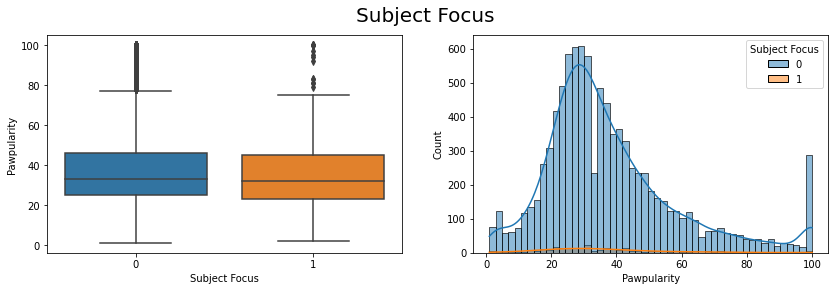

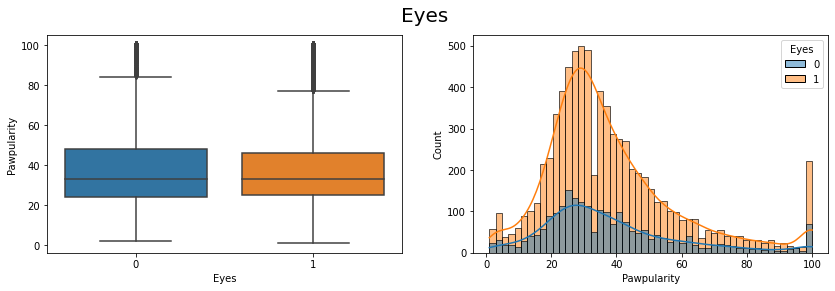

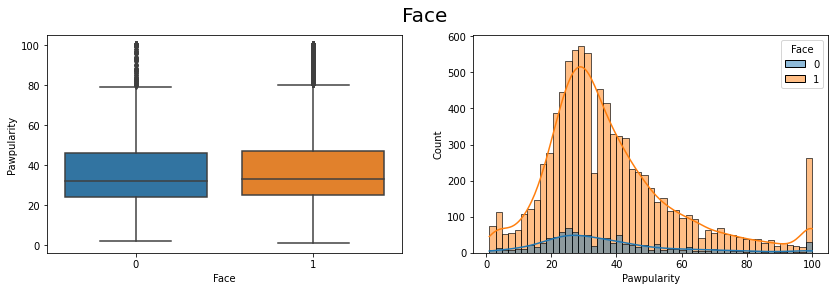

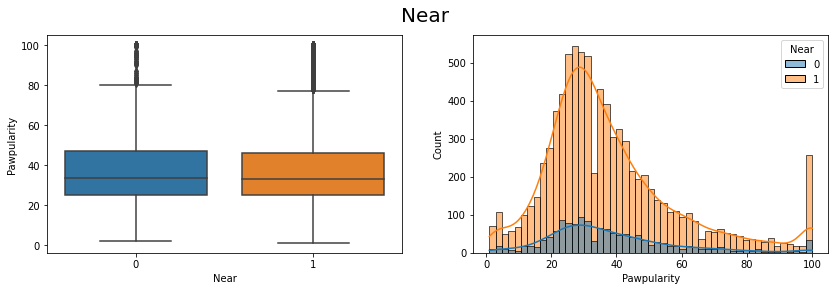

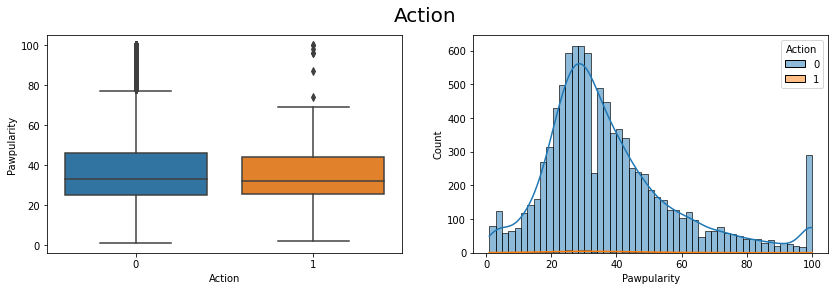

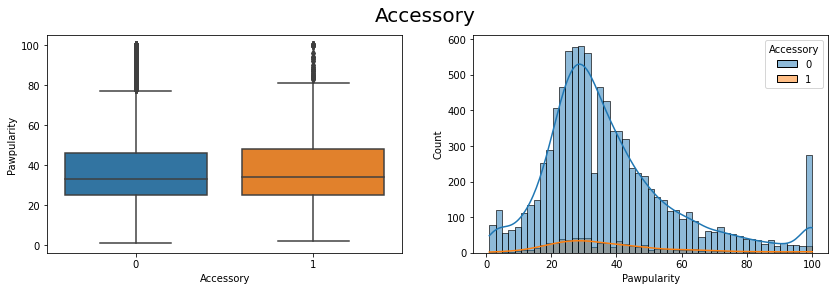

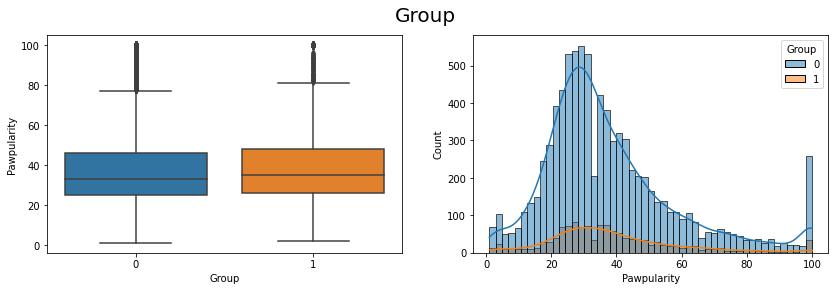

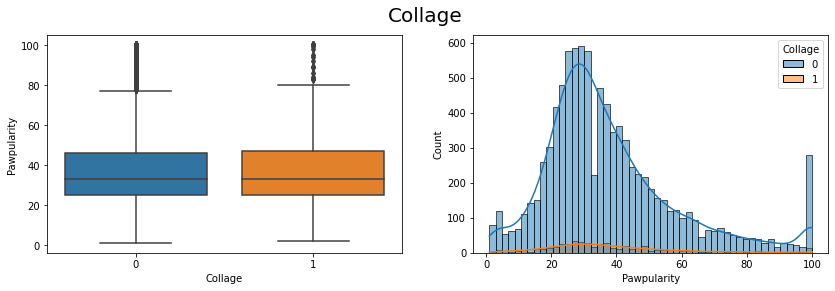

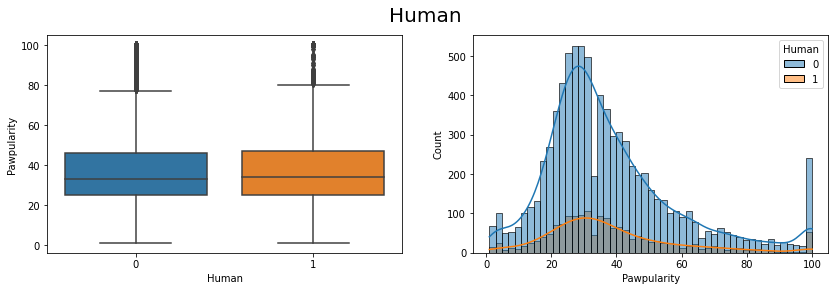

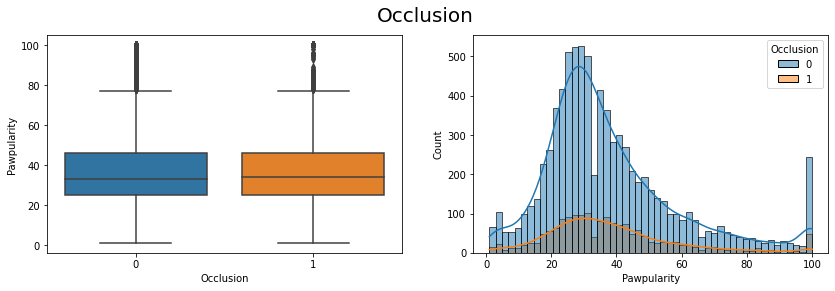

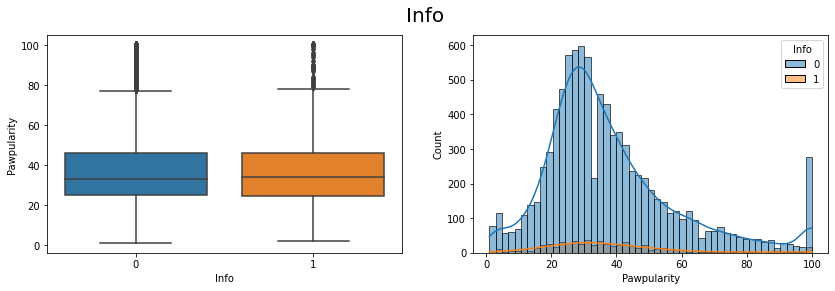

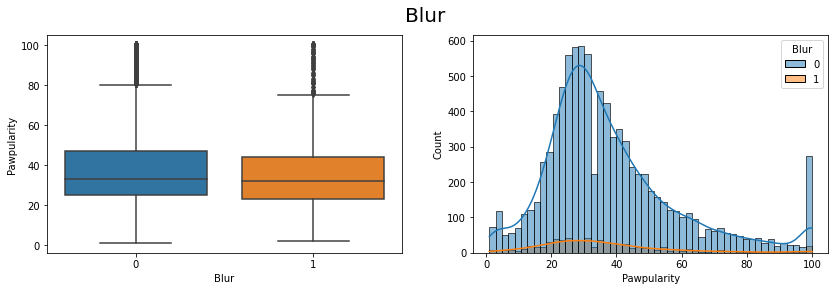

In [6]:
col_var = train_df.columns[1:-1].values.tolist()

for i in col_var:
    fig, ax = plt.subplots(1,2, figsize=(14,4))
    sns.boxplot(data=train_df, x=i, y='Pawpularity', ax=ax[0])
    sns.histplot(data=train_df, x='Pawpularity', hue=i, kde=True, ax=ax[1])
    plt.suptitle(i, fontsize=20)
    fig.show()

**As you see, there isn't any significant relationship between target(Pawplularity) and data attributes! Almost all zeros and ones are in the same variation range!**

So, it can be assumed that the CSV data is not suitable for builing a model and it's better to use the images themselves.

# Preprocessing

<AxesSubplot:>

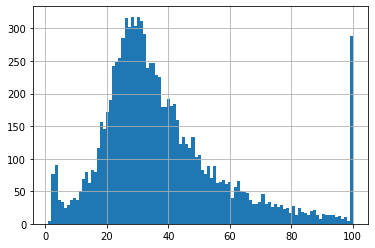

In [7]:
train_df['Pawpularity'].hist(bins=100)

In [8]:
X = train_df[train_df.columns[1:-1]]
y = train_df['Pawpularity']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)

# ElasticNet Regression

Since there are many hyperparameters for each algorithm, we're going to use GridSearchCV tuner to find the best values for the hyperparameters. You can use RandomizedSearchCV too.

In [10]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

ElnetReg = ElasticNet(random_state=42)
ElnetReg_param = {'selection': ['cyclic', 'random'],
                  'warm_start': [True, False],
                  'alpha': list(np.random.random_sample((10,)))}

ElnetReg_GS = GridSearchCV(ElnetReg,
                           ElnetReg_param,
                           scoring = ["r2", "neg_mean_absolute_error"],
                           refit = "r2",
                           cv = 5,
                           verbose=3)

ElnetReg_GS.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] alpha=0.4595306316357075, selection=cyclic, warm_start=True .....
[CV]  alpha=0.4595306316357075, selection=cyclic, warm_start=True, neg_mean_absolute_error=-15.157, r2=-0.001, total=   0.0s
[CV] alpha=0.4595306316357075, selection=cyclic, warm_start=True .....
[CV]  alpha=0.4595306316357075, selection=cyclic, warm_start=True, neg_mean_absolute_error=-15.179, r2=-0.001, total=   0.0s
[CV] alpha=0.4595306316357075, selection=cyclic, warm_start=True .....
[CV]  alpha=0.4595306316357075, selection=cyclic, warm_start=True, neg_mean_absolute_error=-14.883, r2=-0.003, total=   0.0s
[CV] alpha=0.4595306316357075, selection=cyclic, warm_start=True .....
[CV]  alpha=0.4595306316357075, selection=cyclic, warm_start=True, neg_mean_absolute_error=-15.845, r2=-0.002, total=   0.0s
[CV] alpha=0.4595306316357075, selection=cyclic, warm_start=True .....
[CV]  alpha=0.4595306316357075, selection=cyclic, warm_start=True, neg_mean_absolut

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.9429388606283784, selection=cyclic, warm_start=True, neg_mean_absolute_error=-15.182, r2=-0.003, total=   0.0s
[CV] alpha=0.9429388606283784, selection=cyclic, warm_start=False ....
[CV]  alpha=0.9429388606283784, selection=cyclic, warm_start=False, neg_mean_absolute_error=-15.157, r2=-0.001, total=   0.0s
[CV] alpha=0.9429388606283784, selection=cyclic, warm_start=False ....
[CV]  alpha=0.9429388606283784, selection=cyclic, warm_start=False, neg_mean_absolute_error=-15.179, r2=-0.001, total=   0.0s
[CV] alpha=0.9429388606283784, selection=cyclic, warm_start=False ....
[CV]  alpha=0.9429388606283784, selection=cyclic, warm_start=False, neg_mean_absolute_error=-14.883, r2=-0.003, total=   0.0s
[CV] alpha=0.9429388606283784, selection=cyclic, warm_start=False ....
[CV]  alpha=0.9429388606283784, selection=cyclic, warm_start=False, neg_mean_absolute_error=-15.845, r2=-0.002, total=   0.0s
[CV] alpha=0.9429388606283784, selection=cyclic, warm_start=False ....
[CV]  alpha=0.94

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [0.4595306316357075, 0.9429388606283784,
                                   0.33085288207909413, 0.5763943948443414,
                                   0.5713218410019746, 0.16398561206197804,
                                   0.4178953955746625, 0.5967483856864241,
                                   0.8505678372834498, 0.1983081771286802],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             refit='r2', scoring=['r2', 'neg_mean_absolute_error'], verbose=3)

Let's see what are the best hyperparameters found by GridSearchCV

In [11]:
print(ElnetReg_GS.best_params_)
print(ElnetReg_GS.best_score_)

{'alpha': 0.4595306316357075, 'selection': 'cyclic', 'warm_start': True}
-0.0016709497423792019


Time to test the model! I use R2 score to evaluate the model

In [12]:
model_pred = ElnetReg_GS.predict(X_test)
ElnetReg_r2 = r2_score(y_test, model_pred)
ElnetReg_r2

-0.0008285427279919322

Hmmm... a negative R2 score! that's terrible :)

# AdaBoost Regression

In [13]:
from sklearn.ensemble import AdaBoostRegressor

AdaBoostReg = AdaBoostRegressor(random_state=42)
AdaBoostReg_params = {'loss': ['linear', 'square', 'exponential'],
                      'learning_rate': list(np.random.random_sample((5,))),
                      'n_estimators': [50, 100, 200, 400]}

AdaBoostReg_GS = GridSearchCV(AdaBoostReg,
                              AdaBoostReg_params,
                              scoring = ["r2", "neg_mean_absolute_error"],
                              refit = "r2",
                              cv = 5,
                              verbose=3)

AdaBoostReg_GS.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=50 ..
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=50, neg_mean_absolute_error=-15.881, r2=-0.035, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=50 ..
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=50, neg_mean_absolute_error=-15.981, r2=-0.037, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=50 ..
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=50, neg_mean_absolute_error=-15.563, r2=-0.031, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=50 ..
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=50, neg_mean_absolute_error=-16.597, r2=-0.008, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=50 ..
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=50, n

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=100, neg_mean_absolute_error=-15.881, r2=-0.035, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=100 .
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=100, neg_mean_absolute_error=-15.981, r2=-0.037, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=100 .
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=100, neg_mean_absolute_error=-15.563, r2=-0.031, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=100 .
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=100, neg_mean_absolute_error=-16.597, r2=-0.008, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=100 .
[CV]  learning_rate=0.7878436092009511, loss=linear, n_estimators=100, neg_mean_absolute_error=-15.813, r2=-0.007, total=   0.0s
[CV] learning_rate=0.7878436092009511, loss=linear, n_estimators=200 .


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid={'learning_rate': [0.7878436092009511,
                                           0.45544203516917636,
                                           0.18853621987376834,
                                           0.24916352789976326,
                                           0.23446570350767693],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200, 400]},
             refit='r2', scoring=['r2', 'neg_mean_absolute_error'], verbose=3)

In [14]:
print(AdaBoostReg_GS.best_params_)
print(AdaBoostReg_GS.best_score_)

{'learning_rate': 0.7878436092009511, 'loss': 'linear', 'n_estimators': 50}
-0.023615265377149884


In [15]:
model_pred = AdaBoostReg_GS.predict(X_test)
AdaBoostReg_r2 = r2_score(y_test, model_pred)
AdaBoostReg_r2

-0.05968743478816685

# Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(random_state=42)
RFreg_params = {'max_features': ['sqrt', 'log2'],
                'max_depth': [5, 6, 7],
                'bootstrap': [True, False],
                'warm_start': [True, False],
                'oob_score': [True, False]}

RFreg_GS = GridSearchCV(RFreg,
                        RFreg_params,
                        scoring = ["r2", "neg_mean_absolute_error"],
                        refit = "r2",
                        cv = 5,
                        n_jobs = -1,
                        verbose=3)

RFreg_GS.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



[CV] bootstrap=False, criterion=absolute_error, max_depth=6, max_features=log2, oob_score=False, warm_start=False 
[CV]  bootstrap=False, criterion=absolute_error, max_depth=6, max_features=log2, oob_score=False, warm_start=False, neg_mean_absolute_error=nan, r2=nan, total=   0.1s
[CV] bootstrap=False, criterion=absolute_error, max_depth=6, max_features=log2, oob_score=False, warm_start=False 
[CV]  bootstrap=False, criterion=absolute_error, max_depth=6, max_features=log2, oob_score=False, warm_start=False, neg_mean_absolute_error=nan, r2=nan, total=   0.1s
[CV] bootstrap=False, criterion=absolute_error, max_depth=6, max_features=log2, oob_score=False, warm_start=False 
[CV]  bootstrap=False, criterion=absolute_error, max_depth=6, max_features=log2, oob_score=False, warm_start=False, neg_mean_absolute_error=nan, r2=nan, total=   0.1s
[CV] bootstrap=False, criterion=absolute_error, max_depth=7, max_features=sqrt, oob_score=True, warm_start=True 
[CV]  bootstrap=False, criterion=absolut

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.3s



[CV] bootstrap=False, criterion=absolute_error, max_depth=7, max_features=log2, oob_score=True, warm_start=False 
[CV]  bootstrap=False, criterion=absolute_error, max_depth=7, max_features=log2, oob_score=True, warm_start=False, neg_mean_absolute_error=nan, r2=nan, total=   0.0s
[CV] bootstrap=False, criterion=absolute_error, max_depth=7, max_features=log2, oob_score=True, warm_start=False 
[CV]  bootstrap=False, criterion=absolute_error, max_depth=7, max_features=log2, oob_score=True, warm_start=False, neg_mean_absolute_error=nan, r2=nan, total=   0.0s
[CV] bootstrap=False, criterion=absolute_error, max_depth=7, max_features=log2, oob_score=True, warm_start=False 
[CV]  bootstrap=False, criterion=absolute_error, max_depth=7, max_features=log2, oob_score=True, warm_start=False, neg_mean_absolute_error=nan, r2=nan, total=   0.0s
[CV] bootstrap=False, criterion=absolute_error, max_depth=7, max_features=log2, oob_score=False, warm_start=True 
[CV]  bootstrap=False, criterion=absolute_err

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   21.5s
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, cal


[CV]  bootstrap=True, max_depth=6, max_features=sqrt, oob_score=True, warm_start=False, neg_mean_absolute_error=-15.156, r2=-0.001, total=   0.4s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, oob_score=False, warm_start=True 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, oob_score=False, warm_start=True, neg_mean_absolute_error=-15.170, r2=-0.001, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, oob_score=False, warm_start=True 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, oob_score=False, warm_start=True, neg_mean_absolute_error=-15.825, r2=-0.000, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, oob_score=False, warm_start=False 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, oob_score=False, warm_start=False, neg_mean_absolute_error=-15.146, r2=-0.004, total=   0.3s
[CV] bootstrap=True, max_depth=6, max_features=sqrt, oob_score=False, warm_start=False 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, oob_score=

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli


[CV]  bootstrap=True, max_depth=7, max_features=sqrt, oob_score=True, warm_start=False, neg_mean_absolute_error=-15.200, r2=-0.004, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, oob_score=True, warm_start=False 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, oob_score=True, warm_start=False, neg_mean_absolute_error=-15.813, r2=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, oob_score=False, warm_start=True 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, oob_score=False, warm_start=True, neg_mean_absolute_error=-15.158, r2=-0.006, total=   0.3s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, oob_score=False, warm_start=True 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, oob_score=False, warm_start=True, neg_mean_absolute_error=-14.909, r2=-0.006, total=   0.3s
[CV] bootstrap=True, max_depth=7, max_features=sqrt, oob_score=False, warm_start=True 
[CV]  bootstrap=True, max_depth=7, max_features=sqrt, oob_score=Fals

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531


[CV] bootstrap=False, max_depth=5, max_features=sqrt, oob_score=False, warm_start=True 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, oob_score=False, warm_start=True, neg_mean_absolute_error=-14.886, r2=-0.003, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, oob_score=False, warm_start=True 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, oob_score=False, warm_start=True, neg_mean_absolute_error=-15.842, r2=-0.002, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, oob_score=False, warm_start=False 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, oob_score=False, warm_start=False, neg_mean_absolute_error=-15.176, r2=-0.000, total=   0.3s
[CV] bootstrap=False, max_depth=5, max_features=sqrt, oob_score=False, warm_start=False 
[CV]  bootstrap=False, max_depth=5, max_features=sqrt, oob_score=False, warm_start=False, neg_mean_absolute_error=-14.886, r2=-0.003, total=   0.2s
[CV] bootstrap=False, max_depth=5, max_features=log2, o

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531


[CV] bootstrap=False, max_depth=5, max_features=log2, oob_score=False, warm_start=False 
[CV]  bootstrap=False, max_depth=5, max_features=log2, oob_score=False, warm_start=False, neg_mean_absolute_error=-14.886, r2=-0.003, total=   0.3s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, oob_score=True, warm_start=True 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, oob_score=True, warm_start=True, neg_mean_absolute_error=nan, r2=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, oob_score=True, warm_start=True 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, oob_score=True, warm_start=True, neg_mean_absolute_error=nan, r2=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, oob_score=True, warm_start=True 
[CV]  bootstrap=False, max_depth=6, max_features=sqrt, oob_score=True, warm_start=True, neg_mean_absolute_error=nan, r2=nan, total=   0.0s
[CV] bootstrap=False, max_depth=6, max_features=sqrt, oob_score=True, warm_start=Tru

[Parallel(n_jobs=-1)]: Done 237 out of 240 | elapsed:   30.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   30.7s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             refit='r2', scoring=['r2', 'neg_mean_absolute_error'], verbose=3)

In [20]:
print(RFreg_GS.best_params_)
print(RFreg_GS.best_score_)

{'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'oob_score': False, 'warm_start': True}
-0.0017657271100173454


In [21]:
model_pred = RFreg_GS.predict(X_test)
RFreg_r2 = r2_score(y_test, model_pred)
RFreg_r2

-0.0017640342469860126

# SVM Regression

In [23]:
from sklearn.svm import SVR

SVMreg = SVR()
SVMreg_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                 'degree': [2, 3, 4],
                 'C': list(np.random.random_sample((5,))),
                 'gamma': ['scale', 'auto'] + list(np.random.random_sample((3,)))}

SVMreg_GS = GridSearchCV(SVMreg,
                        SVMreg_params,
                        scoring = ["r2", "neg_mean_absolute_error"],
                        refit = "r2",
                        cv = 5,
                        n_jobs = -1,
                        verbose=3)

SVMreg_GS.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   38.4s


[CV] C=0.3066326133977365, degree=2, gamma=scale, kernel=linear ......
[CV]  C=0.3066326133977365, degree=2, gamma=scale, kernel=linear, neg_mean_absolute_error=-14.529, r2=-0.045, total=   1.9s
[CV] C=0.3066326133977365, degree=2, gamma=scale, kernel=linear ......
[CV]  C=0.3066326133977365, degree=2, gamma=scale, kernel=linear, neg_mean_absolute_error=-14.224, r2=-0.038, total=   1.8s
[CV] C=0.3066326133977365, degree=2, gamma=scale, kernel=linear ......
[CV]  C=0.3066326133977365, degree=2, gamma=scale, kernel=linear, neg_mean_absolute_error=-14.924, r2=-0.079, total=   2.2s
[CV] C=0.3066326133977365, degree=2, gamma=scale, kernel=poly ........
[CV]  C=0.3066326133977365, degree=2, gamma=scale, kernel=poly, neg_mean_absolute_error=-14.454, r2=-0.042, total=   2.1s
[CV] C=0.3066326133977365, degree=2, gamma=scale, kernel=poly ........
[CV]  C=0.3066326133977365, degree=2, gamma=scale, kernel=poly, neg_mean_absolute_error=-15.271, r2=-0.063, total=   2.0s
[CV] C=0.3066326133977365, de

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.9min



[CV]  C=0.3066326133977365, degree=2, gamma=0.8180224642517979, kernel=sigmoid, neg_mean_absolute_error=-25.897, r2=-2.173, total=   4.2s
[CV] C=0.3066326133977365, degree=2, gamma=0.5369765560050247, kernel=linear 
[CV]  C=0.3066326133977365, degree=2, gamma=0.5369765560050247, kernel=linear, neg_mean_absolute_error=-14.224, r2=-0.038, total=   1.9s
[CV] C=0.3066326133977365, degree=2, gamma=0.5369765560050247, kernel=linear 
[CV]  C=0.3066326133977365, degree=2, gamma=0.5369765560050247, kernel=linear, neg_mean_absolute_error=-14.924, r2=-0.079, total=   2.9s
[CV] C=0.3066326133977365, degree=2, gamma=0.5369765560050247, kernel=poly 
[CV]  C=0.3066326133977365, degree=2, gamma=0.5369765560050247, kernel=poly, neg_mean_absolute_error=-14.456, r2=-0.043, total=   2.1s
[CV] C=0.3066326133977365, degree=2, gamma=0.5369765560050247, kernel=poly 
[CV]  C=0.3066326133977365, degree=2, gamma=0.5369765560050247, kernel=poly, neg_mean_absolute_error=-15.268, r2=-0.062, total=   2.1s
[CV] C=0.

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  6.6min



[CV]  C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=linear, neg_mean_absolute_error=-15.281, r2=-0.062, total=   2.0s
[CV] C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=poly 
[CV]  C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=poly, neg_mean_absolute_error=-14.536, r2=-0.046, total=   2.8s
[CV] C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=poly 
[CV]  C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=poly, neg_mean_absolute_error=-14.234, r2=-0.039, total=   2.1s
[CV] C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=poly 
[CV]  C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=poly, neg_mean_absolute_error=-14.949, r2=-0.078, total=   2.1s
[CV] C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=rbf 
[CV]  C=0.3066326133977365, degree=4, gamma=0.0917919231271992, kernel=rbf, neg_mean_absolute_error=-14.466, r2=-0.043, total=   3.2s
[CV] C=0.30663261339

[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 11.8min



[CV] C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=linear 
[CV]  C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=linear, neg_mean_absolute_error=-14.921, r2=-0.079, total=   1.9s
[CV] C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=poly 
[CV]  C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=poly, neg_mean_absolute_error=-14.475, r2=-0.045, total=   2.4s
[CV] C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=poly 
[CV]  C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=poly, neg_mean_absolute_error=-15.248, r2=-0.060, total=   2.1s
[CV] C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=rbf 
[CV]  C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=rbf, neg_mean_absolute_error=-14.518, r2=-0.043, total=   3.0s
[CV] C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=rbf 
[CV]  C=0.4954943017379566, degree=3, gamma=0.5369765560050247, kernel=rbf, ne

[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 18.6min



[CV] C=0.8272363989013611, degree=3, gamma=auto, kernel=poly .........
[CV]  C=0.8272363989013611, degree=3, gamma=auto, kernel=poly, neg_mean_absolute_error=-14.470, r2=-0.044, total=   2.4s
[CV] C=0.8272363989013611, degree=3, gamma=auto, kernel=poly .........
[CV]  C=0.8272363989013611, degree=3, gamma=auto, kernel=poly, neg_mean_absolute_error=-15.300, r2=-0.063, total=   2.1s
[CV] C=0.8272363989013611, degree=3, gamma=auto, kernel=rbf ..........
[CV]  C=0.8272363989013611, degree=3, gamma=auto, kernel=rbf, neg_mean_absolute_error=-14.520, r2=-0.044, total=   3.0s
[CV] C=0.8272363989013611, degree=3, gamma=auto, kernel=rbf ..........
[CV]  C=0.8272363989013611, degree=3, gamma=auto, kernel=rbf, neg_mean_absolute_error=-14.229, r2=-0.039, total=   3.0s
[CV] C=0.8272363989013611, degree=3, gamma=auto, kernel=rbf ..........
[CV]  C=0.8272363989013611, degree=3, gamma=auto, kernel=rbf, neg_mean_absolute_error=-14.941, r2=-0.082, total=   3.3s
[CV] C=0.8272363989013611, degree=3, gamma

[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 26.9min



[CV] C=0.5078843648821761, degree=4, gamma=auto, kernel=poly .........
[CV]  C=0.5078843648821761, degree=4, gamma=auto, kernel=poly, neg_mean_absolute_error=-15.304, r2=-0.064, total=   2.1s
[CV] C=0.5078843648821761, degree=4, gamma=auto, kernel=rbf ..........
[CV]  C=0.5078843648821761, degree=4, gamma=auto, kernel=rbf, neg_mean_absolute_error=-14.521, r2=-0.044, total=   3.0s
[CV] C=0.5078843648821761, degree=4, gamma=auto, kernel=rbf ..........
[CV]  C=0.5078843648821761, degree=4, gamma=auto, kernel=rbf, neg_mean_absolute_error=-14.229, r2=-0.040, total=   3.3s
[CV] C=0.5078843648821761, degree=4, gamma=auto, kernel=rbf ..........
[CV]  C=0.5078843648821761, degree=4, gamma=auto, kernel=rbf, neg_mean_absolute_error=-14.949, r2=-0.083, total=   3.0s
[CV] C=0.5078843648821761, degree=4, gamma=auto, kernel=sigmoid ......
[CV]  C=0.5078843648821761, degree=4, gamma=auto, kernel=sigmoid, neg_mean_absolute_error=-14.472, r2=-0.044, total=   3.2s
[CV] C=0.5078843648821761, degree=4, ga

[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 35.2min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.3066326133977365, 0.4954943017379566,
                               0.8272363989013611, 0.5078843648821761,
                               0.704648438550303],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.0917919231271992,
                                   0.8180224642517979, 0.5369765560050247],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='r2', scoring=['r2', 'neg_mean_absolute_error'], verbose=3)

In [24]:
print(SVMreg_GS.best_params_)
print(SVMreg_GS.best_score_)

{'C': 0.4954943017379566, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
-0.05315210359211799


In [25]:
model_pred = SVMreg_GS.predict(X_test)
SVMreg_r2 = r2_score(y_test, model_pred)
SVMreg_r2

-0.06095478416018474

# XGB Regression

In [28]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

XGBreg = xgb.XGBRegressor(random_state=42)
XGBreg_param = {'booster': ['gbtree', 'gblinear', 'dart'],
                'learning_rate': list(np.random.random_sample((3,))),
                'gamma': list(np.random.random_sample((3,))),
                'max_depth': [5, 6, 7],
                'n_estimators': [100, 200, 400]}

XGBreg_GS = GridSearchCV(XGBreg,
                         XGBreg_param,
                         scoring = ["r2", "neg_mean_absolute_error"],
                         refit = "r2",
                         cv = 5,
                         n_jobs = -1,
                         verbose=3)

XGBreg_GS.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.0min


[CV] booster=gbtree, gamma=0.13813876934737612, learning_rate=0.11066010406675952, max_depth=5, n_estimators=100 
[CV]  booster=gbtree, gamma=0.13813876934737612, learning_rate=0.11066010406675952, max_depth=5, n_estimators=100, neg_mean_absolute_error=-15.382, r2=-0.025, total=   3.9s
[CV] booster=gbtree, gamma=0.13813876934737612, learning_rate=0.11066010406675952, max_depth=5, n_estimators=100 
[CV]  booster=gbtree, gamma=0.13813876934737612, learning_rate=0.11066010406675952, max_depth=5, n_estimators=100, neg_mean_absolute_error=-15.871, r2=-0.006, total=   1.1s
[CV] booster=gbtree, gamma=0.13813876934737612, learning_rate=0.11066010406675952, max_depth=5, n_estimators=200 
[CV]  booster=gbtree, gamma=0.13813876934737612, learning_rate=0.11066010406675952, max_depth=5, n_estimators=200, neg_mean_absolute_error=-15.394, r2=-0.035, total=   2.1s
[CV] booster=gbtree, gamma=0.13813876934737612, learning_rate=0.11066010406675952, max_depth=5, n_estimators=200 
[CV]  booster=gbtree, gam

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.9min



[CV] booster=gbtree, gamma=0.13813876934737612, learning_rate=0.9712859280926744, max_depth=6, n_estimators=400 
[CV]  booster=gbtree, gamma=0.13813876934737612, learning_rate=0.9712859280926744, max_depth=6, n_estimators=400, neg_mean_absolute_error=-15.446, r2=-0.043, total=   8.2s
[CV] booster=gbtree, gamma=0.13813876934737612, learning_rate=0.9712859280926744, max_depth=6, n_estimators=400 
[CV]  booster=gbtree, gamma=0.13813876934737612, learning_rate=0.9712859280926744, max_depth=6, n_estimators=400, neg_mean_absolute_error=-15.159, r2=-0.032, total=  15.8s
[CV] booster=gbtree, gamma=0.13813876934737612, learning_rate=0.9712859280926744, max_depth=6, n_estimators=400 
[CV]  booster=gbtree, gamma=0.13813876934737612, learning_rate=0.9712859280926744, max_depth=6, n_estimators=400, neg_mean_absolute_error=-15.413, r2=-0.053, total=   6.9s
[CV] booster=gbtree, gamma=0.13813876934737612, learning_rate=0.9712859280926744, max_depth=7, n_estimators=100 
[CV]  booster=gbtree, gamma=0.1

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 17.4min



[CV] booster=gbtree, gamma=0.15157563325294887, learning_rate=0.9712859280926744, max_depth=5, n_estimators=200 
[CV]  booster=gbtree, gamma=0.15157563325294887, learning_rate=0.9712859280926744, max_depth=5, n_estimators=200, neg_mean_absolute_error=-15.957, r2=-0.015, total=  18.4s
[CV] booster=gbtree, gamma=0.15157563325294887, learning_rate=0.9712859280926744, max_depth=5, n_estimators=400 
[CV]  booster=gbtree, gamma=0.15157563325294887, learning_rate=0.9712859280926744, max_depth=5, n_estimators=400, neg_mean_absolute_error=-15.464, r2=-0.043, total=  19.7s
[CV] booster=gbtree, gamma=0.15157563325294887, learning_rate=0.9712859280926744, max_depth=5, n_estimators=400 
[CV]  booster=gbtree, gamma=0.15157563325294887, learning_rate=0.9712859280926744, max_depth=5, n_estimators=400, neg_mean_absolute_error=-15.210, r2=-0.039, total=  18.8s
[CV] booster=gbtree, gamma=0.15157563325294887, learning_rate=0.9712859280926744, max_depth=5, n_estimators=400 
[CV]  booster=gbtree, gamma=0.1

[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 26.5min



[CV]  booster=gblinear, gamma=0.13813876934737612, learning_rate=0.8777637531712105, max_depth=7, n_estimators=100, neg_mean_absolute_error=-15.154, r2=0.001, total=   0.3s
[CV] booster=gblinear, gamma=0.13813876934737612, learning_rate=0.8777637531712105, max_depth=7, n_estimators=200 
[09:24:22] WARNING: ../src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  booster=gblinear, gamma=0.13813876934737612, learning_rate=0.8777637531712105, max_depth=7, n_estimators=200, neg_mean_absolute_error=-15.202, r2=-0.005, total=   0.4s
[CV] booster=gblinear, gamma=0.13813876934737612, learning_rate=0.8777637531712105, max_depth=7, n_estimators=200 
[09:24:22] WARNING: ../src/learner.cc:576: 
Parameter

[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 29.0min



[CV]  booster=gblinear, gamma=0.911493697937794, learning_rate=0.9712859280926744, max_depth=5, n_estimators=200, neg_mean_absolute_error=-15.202, r2=-0.005, total=   0.4s
[CV] booster=gblinear, gamma=0.911493697937794, learning_rate=0.9712859280926744, max_depth=5, n_estimators=200 
[09:27:05] WARNING: ../src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  booster=gblinear, gamma=0.911493697937794, learning_rate=0.9712859280926744, max_depth=5, n_estimators=200, neg_mean_absolute_error=-15.839, r2=-0.001, total=   0.4s
[CV] booster=gblinear, gamma=0.911493697937794, learning_rate=0.9712859280926744, max_depth=5, n_estimators=400 
[09:27:05] WARNING: ../src/learner.cc:576: 
Parameters: { "g

[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 237.5min



[CV]  booster=dart, gamma=0.911493697937794, learning_rate=0.11066010406675952, max_depth=6, n_estimators=200, neg_mean_absolute_error=-15.319, r2=-0.030, total= 1.0min
[CV] booster=dart, gamma=0.911493697937794, learning_rate=0.11066010406675952, max_depth=6, n_estimators=400 
[CV]  booster=dart, gamma=0.911493697937794, learning_rate=0.11066010406675952, max_depth=6, n_estimators=400, neg_mean_absolute_error=-15.527, r2=-0.048, total= 2.9min
[CV] booster=dart, gamma=0.911493697937794, learning_rate=0.11066010406675952, max_depth=6, n_estimators=400 
[CV]  booster=dart, gamma=0.911493697937794, learning_rate=0.11066010406675952, max_depth=6, n_estimators=400, neg_mean_absolute_error=-15.934, r2=-0.012, total= 2.8min
[CV] booster=dart, gamma=0.911493697937794, learning_rate=0.11066010406675952, max_depth=7, n_estimators=100 
[CV]  booster=dart, gamma=0.911493697937794, learning_rate=0.11066010406675952, max_depth=7, n_estimators=100, neg_mean_absolute_error=-15.395, r2=-0.037, total= 

[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 278.8min finished


[13:37:03] WARNING: ../src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0.13813876934737612, 0.15157563325294887,
        

In [29]:
print(XGBreg_GS.best_params_)
print(XGBreg_GS.best_score_)

{'booster': 'gblinear', 'gamma': 0.15157563325294887, 'learning_rate': 0.8777637531712105, 'max_depth': 6, 'n_estimators': 100}
-0.002863236526097479


In [30]:
model_pred = XGBreg_GS.predict(X_test)
XGBreg_r2 = r2_score(y_test, model_pred)
XGBreg_r2

-0.0014321364972478268

# Results of Regression algorithms

As we have guessed from the diagrams, the csv data is not suitable for training and we should use images themselves. Let's try it

# CNN with a regression head

Due to RAM limitation, I'm going to choose 7000 images randomly for training and resize them to 256 * 256 pixels

In [32]:
import cv2
import random

train_imgs_path = '../input/petfinder-pawpularity-score/train'
train_imgs_files = os.listdir(train_imgs_path)
train_smpls_imgs = random.sample(train_imgs_files, 7000)

X = []
for img_name in train_smpls_imgs:
    image = cv2.imread(train_imgs_path + '/' + img_name, 1)
    image = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    X.append(np.array(image))

Extracting the score(Pawpularity) of each image in the training set(X)

In [33]:
y = []
for i in range(len(train_smpls_imgs)):
    y.append(int(train_df[train_df.Id == train_smpls_imgs[i].split('.')[0]]['Pawpularity'].values[0]))

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.layers import InputLayer, Lambda, Conv2D, LeakyReLU, Dropout, MaxPooling2D, BatchNormalization, Flatten, Dense

cnn_model = Sequential()
cnn_model.add(InputLayer(input_shape=(256,256,3)))
cnn_model.add(Lambda(lambda x: x/255.))   #Normalization

cnn_model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same'))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Flatten())
cnn_model.add(Dense(4096))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(2048))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1024))
cnn_model.add(LeakyReLU(alpha=0.2))
cnn_model.add(Dense(1))

cnn_model.compile(optimizer='adam', loss= 'MeanAbsoluteError', metrics=[keras.metrics.MeanAbsoluteError()])
cnn_model.summary()

2022-08-28 13:44:40.038488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 13:44:40.039801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 13:44:40.040611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 13:44:40.041595: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      2

In [36]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
             tf.keras.callbacks.ModelCheckpoint(filepath='/kaggle/working/result', monitor='val_loss', mode='min')]

history = cnn_model.fit(x = X_train,
                        y = y_train,
                        batch_size = 20,
                        callbacks = callbacks,
                        validation_split = 0.2,
                        verbose = 1,
                        epochs = 50)

2022-08-28 13:44:55.074484: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 880803840 exceeds 10% of free system memory.
2022-08-28 13:44:56.067450: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 880803840 exceeds 10% of free system memory.
2022-08-28 13:44:56.795684: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-08-28 13:44:59.145861: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


224/224 [==============================] - 64s 243ms/step - loss: 17.6830 - mean_absolute_error: 17.6830 - val_loss: 15.5210 - val_mean_absolute_error: 15.5210


2022-08-28 13:46:02.794816: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-08-28 13:46:08.555357: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 536870912 exceeds 10% of free system memory.
2022-08-28 13:46:09.142007: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 536870912 exceeds 10% of free system memory.
2022-08-28 13:46:09.716620: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 536870912 exceeds 10% of free system memory.


Epoch 2/50
224/224 [==============================] - 54s 241ms/step - loss: 15.7277 - mean_absolute_error: 15.7277 - val_loss: 16.3537 - val_mean_absolute_error: 16.3537
Epoch 3/50
224/224 [==============================] - 55s 246ms/step - loss: 15.7265 - mean_absolute_error: 15.7265 - val_loss: 15.1999 - val_mean_absolute_error: 15.1999
Epoch 4/50
224/224 [==============================] - 54s 241ms/step - loss: 15.4219 - mean_absolute_error: 15.4219 - val_loss: 14.6024 - val_mean_absolute_error: 14.6024
Epoch 5/50
224/224 [==============================] - 55s 247ms/step - loss: 15.3265 - mean_absolute_error: 15.3265 - val_loss: 15.0300 - val_mean_absolute_error: 15.0300
Epoch 6/50
224/224 [==============================] - 54s 242ms/step - loss: 15.2542 - mean_absolute_error: 15.2542 - val_loss: 14.7578 - val_mean_absolute_error: 14.7578
Epoch 7/50
224/224 [==============================] - 55s 244ms/step - loss: 15.2488 - mean_absolute_error: 15.2488 - val_loss: 14.7797 - val_mea

In [38]:
model_pred = cnn_model.predict(X_test)
CNNreg_r2 = r2_score(y_test, model_pred)
CNNreg_r2

-0.0795106880751093